Abstract : To predict if a crop will be alive or damaged

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Import training data and testing data
df =pd.read_excel('train_agriculture.xlsx')
testing_data = pd.read_excel('test_agriculture.xlsx')

In [3]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


    No Null values. All data types are either integer or float. No need to make any modifications.

In [5]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


    1. Mean > Median in Estimated_Insects_Count,Number_Weeks_Quit. Hence Right skewed data.
    2. Outliers are present as 75% and max values have a wide range in Estimated_Insects_Count,Number_Weeks_Quit,Number_Weeks_Used.

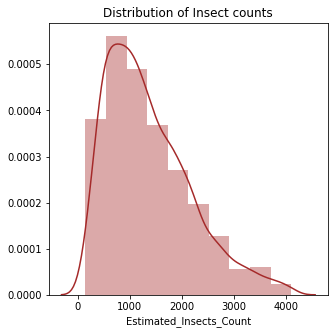

In [48]:
#Estimated Insects Count
plt.figure(figsize=(5,5))
sns.distplot(df['Estimated_Insects_Count'],bins=10,color='brown')
plt.title('Distribution of Insect counts')
plt.show()

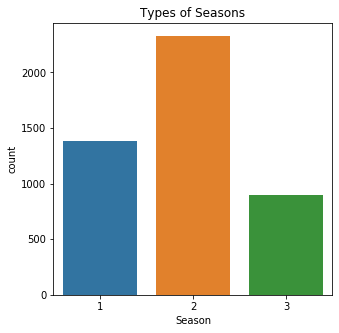

In [7]:
plt.figure(figsize=(5,5))
sns.countplot(df['Season'])
plt.title('Types of Seasons')
plt.show()

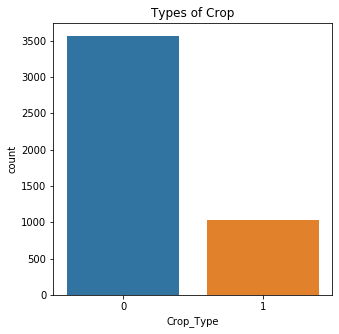

In [8]:
plt.figure(figsize=(5,5))
sns.countplot(df['Crop_Type'])
plt.title('Types of Crop')
plt.show()

Text(0.5, 1.0, 'How much pesticides were used in weeks')

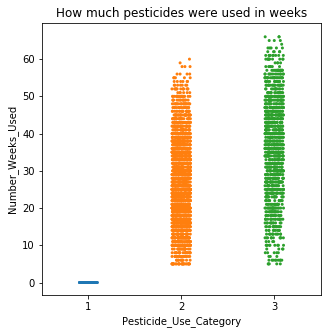

In [9]:
plt.figure(figsize=(5,5))
sns.stripplot(df['Pesticide_Use_Category'],df['Number_Weeks_Used'],size=3)
plt.title('How much pesticides were used in weeks')

Text(0.5, 1.0, 'Doses of Pesticide given')

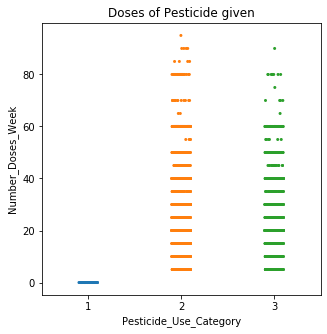

In [10]:
plt.figure(figsize=(5,5))
sns.stripplot(df['Pesticide_Use_Category'],df['Number_Doses_Week'],size=3)
plt.title('Doses of Pesticide given')

Text(0.5, 1, 'Reaction of Crops based on pesticides and its uses ')

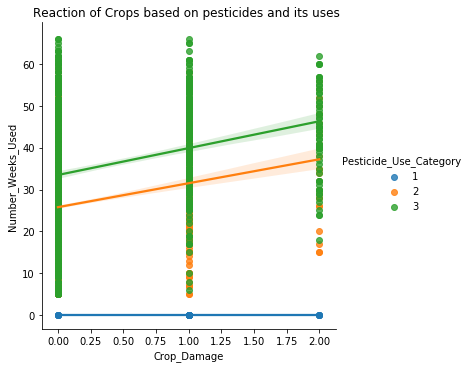

In [11]:
sns.lmplot('Crop_Damage','Number_Weeks_Used',data=df,hue='Pesticide_Use_Category')
plt.title('Reaction of Crops based on pesticides and its uses ')

    We can see that when only pesticide 3 was used, crops were alive. When Pesticide 2 was used, the crops were damaged.

Text(0.5, 1, 'Relation between Cropt type and Soil Type')

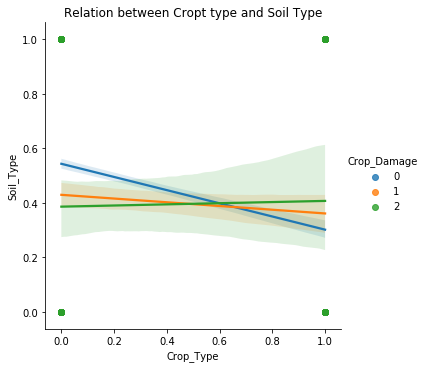

In [12]:
sns.lmplot('Crop_Type','Soil_Type',data=df,hue='Crop_Damage')
plt.title('Relation between Cropt type and Soil Type')

    We can observe that Crop type and soil type are negatively correlated.

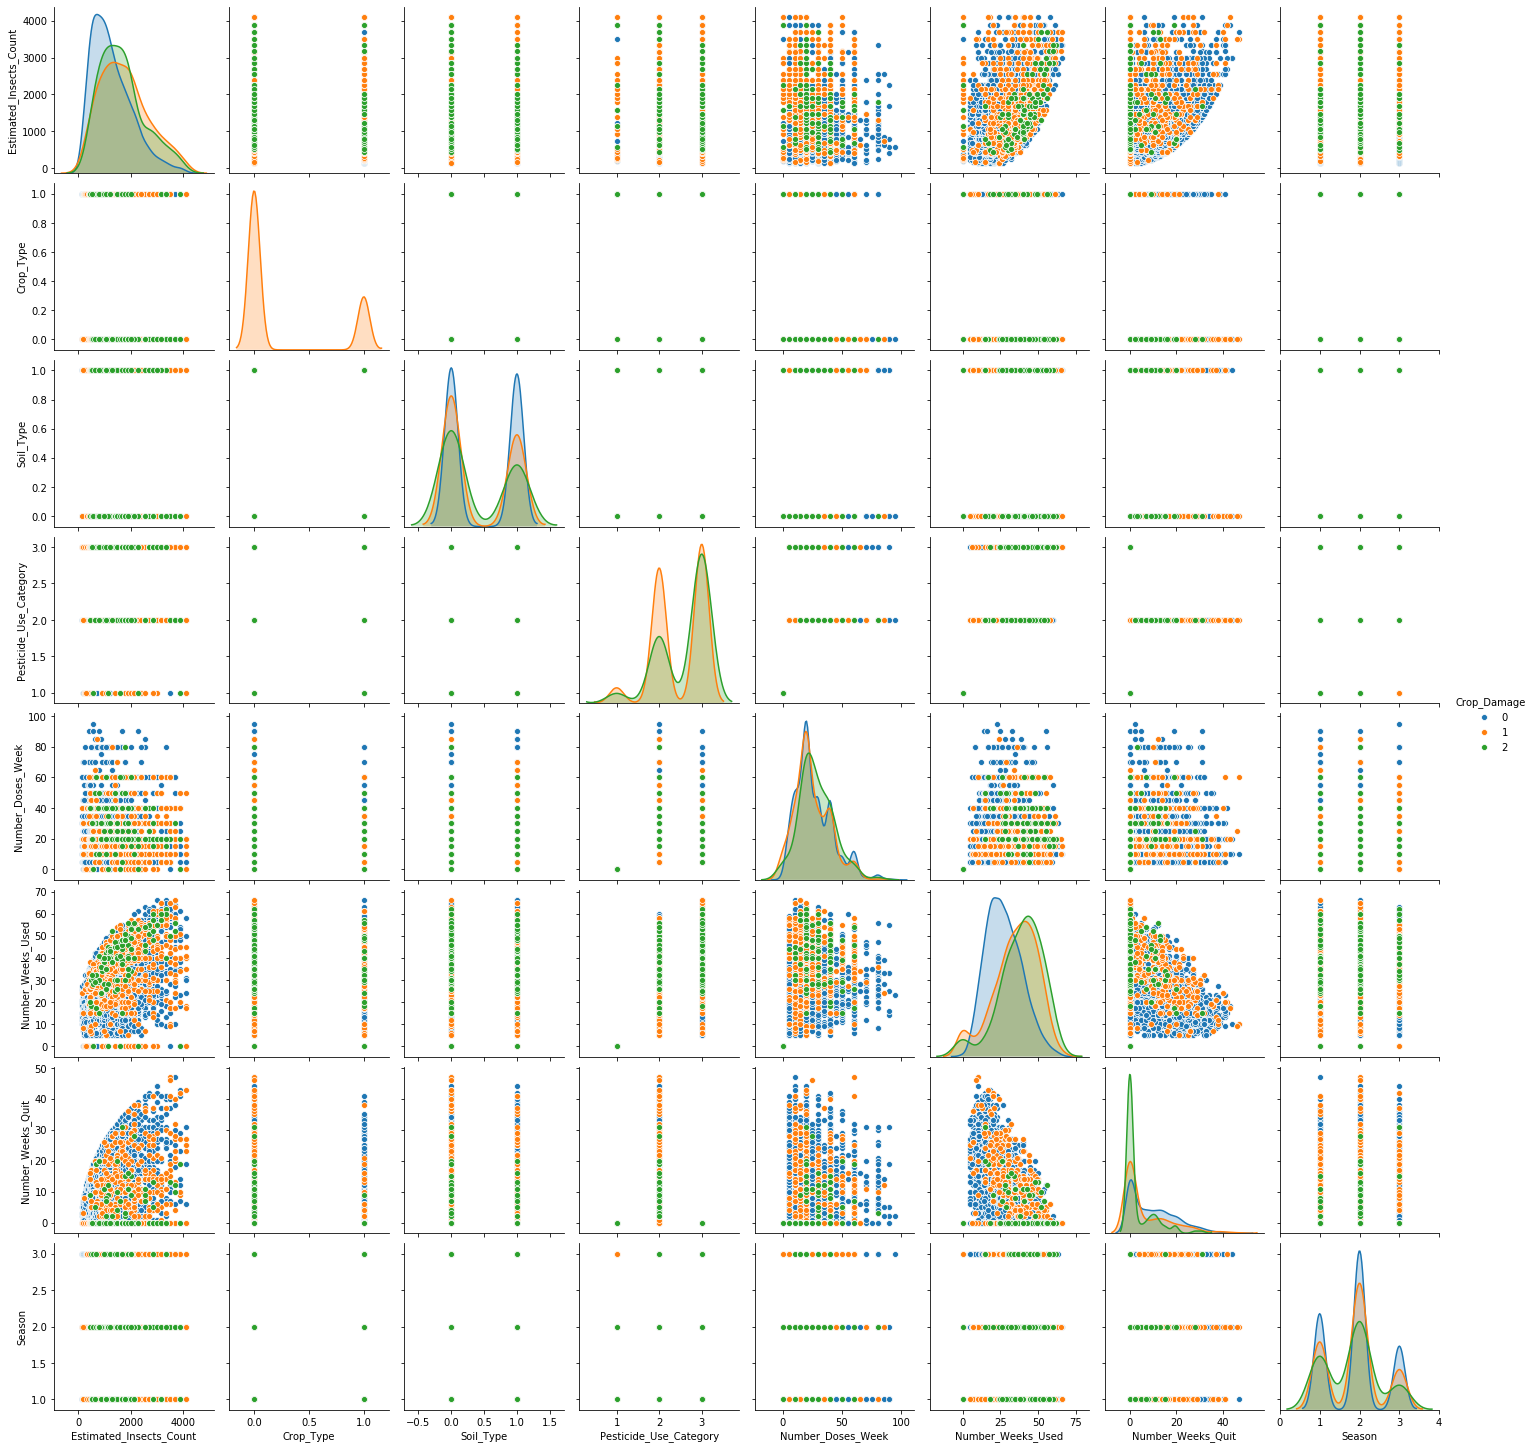

In [13]:
sns.pairplot(df,hue='Crop_Damage')

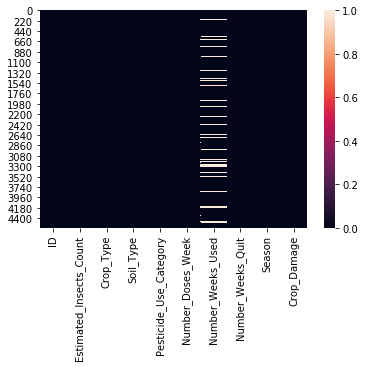

In [14]:
sns.heatmap(df.isnull())

    ID                           0
    Estimated_Insects_Count      0
    Crop_Type                    0
    Soil_Type                    0
    Pesticide_Use_Category       0
    Number_Doses_Week            0
    Number_Weeks_Used          442
    Number_Weeks_Quit            0
    Season                       0
    Crop_Damage                  0

In [15]:
df['Number_Weeks_Used'].replace(np.NaN,0,inplace=True)

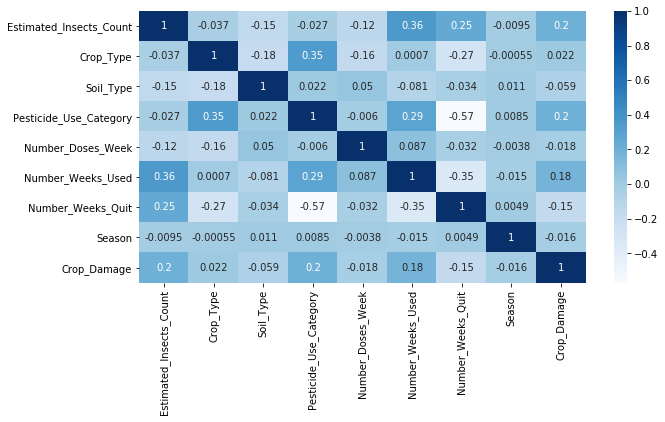

In [16]:
#correlation:

corr = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='Blues')

In [17]:
df.drop('ID',axis=1,inplace=True)

In [18]:
df['Crop_Damage'].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

Imbalanced Dataset

In [19]:
#df['Crop_Damage'] = df['Crop_Damage'].replace(2,1)
#df['Crop_Damage'].value_counts()

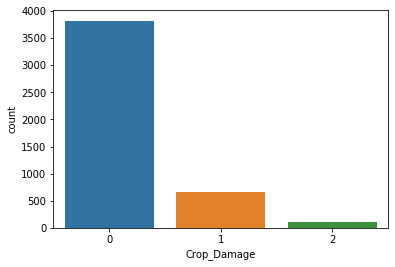

In [20]:
sns.countplot(df['Crop_Damage'])

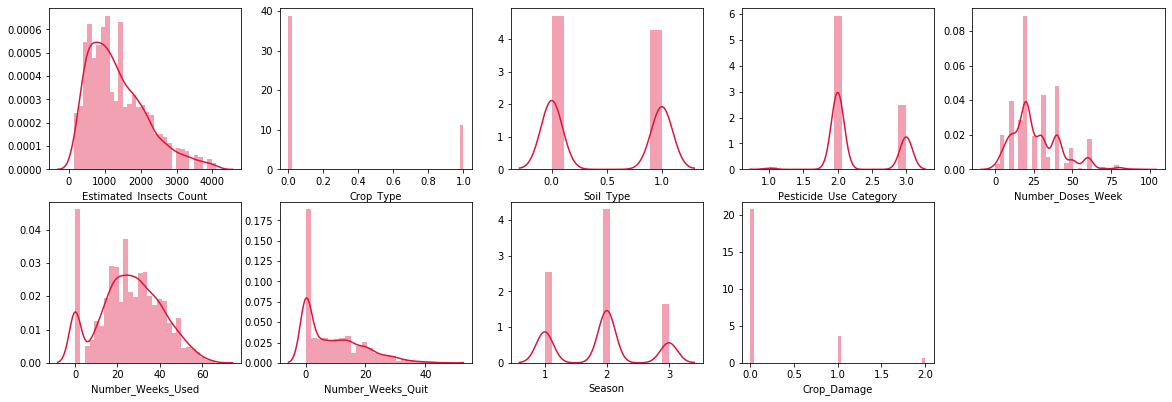

In [21]:
#To check for skewness :
col = df.columns.values
plt.figure(figsize=(20,35))
for i in range(0,len(col)):
    plt.subplot(10,5,i+1)
    sns.distplot(df[col[i]],color='crimson')
plt.show()

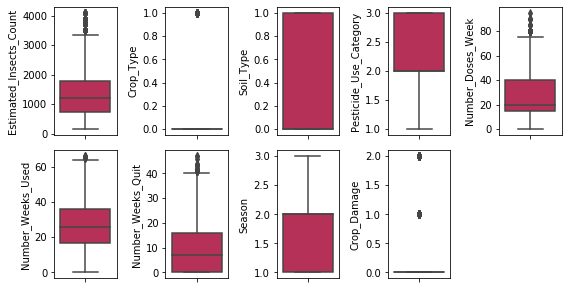

In [22]:

#Check for outliers :
plt.figure(figsize=(8,20))
for i in range(0,len(col)):
    plt.subplot(10,5,i+1)
    sns.boxplot(df[col[i]],palette='rocket',orient='v')
    plt.tight_layout()


In [23]:
#Feature Selection :
from sklearn.model_selection import train_test_split

X = df.drop('Crop_Damage',axis=1)
y = df.iloc[:,-1:]

In [24]:
X['Crop_Type'].value_counts()

0    3565
1    1034
Name: Crop_Type, dtype: int64

In [25]:
testing_data['Crop_Type'].value_counts()

0    966
1    233
Name: Crop_Type, dtype: int64

In [26]:
#Check for skew values : if skewness is > 0.50, skewness needs to be removed.
X.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used         -0.007168
Number_Weeks_Quit          0.919771
Season                     0.144841
dtype: float64

In [27]:
#To remove skewness :
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer('yeo-johnson')
X = pd.DataFrame(pt.fit_transform(X))

In [28]:
X.skew()

0   -0.032846
1    1.318693
2    0.093631
3   -0.047595
4    0.008110
5   -0.315941
6   -0.089868
7   -0.042471
dtype: float64

In [29]:
X[1]

0       1.856819
1       1.856819
2       1.856819
3       1.856819
4       1.856819
          ...   
4594   -0.538556
4595   -0.538556
4596   -0.538556
4597   -0.538556
4598   -0.538556
Name: 1, Length: 4599, dtype: float64

In [30]:
y.replace(2,1,inplace=True)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [33]:
# algorithm to calculate the random state where models give better score :
def calBestRandomStateOf(model):
    max_score=0
    for i in range(40,200):
        x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=i)
        model.fit(x_train,y_train)
        pred = model.predict(x_test)
        score = accuracy_score(y_test,pred)
        if score>max_score:
            max_score = score
            final_state = i

    return final_state


In [34]:
#check for various models and its scores :
model = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),SVC()]

for i in range(len(model)):
    state = calBestRandomStateOf(model[i])
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=state)
    model[i].fit(x_train,y_train)
    score = model[i].score(x_train,y_train)
    y_pred = model[i].predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    classificationReport = classification_report(y_test,y_pred)
    confusionMatrix = confusion_matrix(y_test,y_pred)
    
    print("*************************************************************************************")
    print("Random State : ",state)
    print("Score of ",model[i]," is : ", score)
    print("Accuracy : ",accuracy*100,"% ")
    print("Classification Report : \n")
    print(classificationReport)
    print("Confusion Matrix :\n ")
    print(confusionMatrix)
    print("*************************************************************************************")



*************************************************************************************
Random State :  180
Score of  LogisticRegression()  is :  0.8219624898070128
Accuracy :  85.65217391304348 % 
Classification Report : 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       784
           1       0.60      0.09      0.15       136

    accuracy                           0.86       920
   macro avg       0.73      0.54      0.54       920
weighted avg       0.82      0.86      0.81       920

Confusion Matrix :
 
[[776   8]
 [124  12]]
*************************************************************************************
*************************************************************************************
Random State :  144
Score of  DecisionTreeClassifier()  is :  0.9989127480293558
Accuracy :  80.0 % 
Classification Report : 

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       773

In [35]:
#Cross Validation :
from sklearn.model_selection import cross_val_score

model = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),SVC()]
for i in range(len(model)):
    cv_score = cross_val_score(model[i],X,y,cv=5,scoring='accuracy')
    print("*************************************************************************************")
    print("Score for ",model[i]," : ")
    print("Score : ", cv_score)
    print("Mean : ", cv_score.mean())
    print("Standard Deviation : ", cv_score.std())
    print("*************************************************************************************")
    print("")


*************************************************************************************
Score for  LogisticRegression()  : 
Score :  [0.78478261 0.82717391 0.8326087  0.82391304 0.83351469]
Mean :  0.820398590149974
Standard Deviation :  0.01815419106417786
*************************************************************************************

*************************************************************************************
Score for  DecisionTreeClassifier()  : 
Score :  [0.67826087 0.72173913 0.72282609 0.72934783 0.7508161 ]
Mean :  0.7205980035009698
Standard Deviation :  0.02361521737099645
*************************************************************************************

*************************************************************************************
Score for  KNeighborsClassifier()  : 
Score :  [0.74673913 0.81086957 0.79130435 0.79565217 0.82807399]
Mean :  0.7945278421724937
Standard Deviation :  0.027158100766598567
*************************************************

    SVC scores the highest accuracy but since the dataset is imbalanced, we will use penalized SVC to get better 
    classification results.

In [36]:
#GridSearchCV - Penalized SVC
from sklearn.model_selection import GridSearchCV

param_dict = {'C': [0.1, 1, 10],  
              'gamma': [10,1, 0.1, 0.01], 
              'kernel': ['linear','rbf'],
              'class_weight':['dict','balanced'],
              'probability':[True,False]
              }

gridsearch = GridSearchCV(SVC(),param_dict,n_jobs=-1,pre_dispatch=2)
gridsearch.fit(X,y)
gridsearch.best_params_
                         

{'C': 0.1,
 'class_weight': 'balanced',
 'gamma': 10,
 'kernel': 'rbf',
 'probability': True}

In [37]:
#Using the best parameters, build a svc model:

from sklearn.metrics import mean_absolute_error, mean_squared_error

svc = SVC(C=0.1,gamma=10,kernel='rbf',class_weight='balanced',probability=True)
state = calBestRandomStateOf(svc)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state = state )

svc.fit(x_train,y_train)
score = svc.score(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)

print("Score for SVC : ",score)
print("Accuracy Score for SVC : ",accuracy)
print("Classification Report : \n")
print(classification_report(y_test,y_pred))
print("Confusion Matrix :\n ")
print(confusion_matrix(y_test,y_pred))
print("Mean Absolute Error : " ,mean_absolute_error(y_test,y_pred))
print("Mean Squared Error : " ,mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error : " ,np.sqrt(mean_squared_error(y_test,y_pred)))



Score for SVC :  0.8317477575428105
Accuracy Score for SVC :  0.8554347826086957
Classification Report : 

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       787
           1       0.00      0.00      0.00       133

    accuracy                           0.86       920
   macro avg       0.43      0.50      0.46       920
weighted avg       0.73      0.86      0.79       920

Confusion Matrix :
 
[[787   0]
 [133   0]]
Mean Absolute Error :  0.14456521739130435
Mean Squared Error :  0.14456521739130435
Root Mean Squared Error :  0.38021732915702877


In [38]:
#K-fold Cross Validation
cv_score = cross_val_score(svc,X,y,cv=4,scoring='accuracy')
print("*************************************************************************************")
print("Score for ",svc," : ")
print("Score : ", cv_score)
print("Mean : ", cv_score.mean())
print("Standard Deviation : ", cv_score.std())
print("*************************************************************************************")
print("")

*************************************************************************************
Score for  SVC(C=0.1, class_weight='balanced', gamma=10, probability=True)  : 
Score :  [0.82956522 0.83043478 0.82782609 0.83115753]
Mean :  0.829745903810497
Standard Deviation :  0.0012435415143679633
*************************************************************************************



In [39]:
#Boost scores using Ensembling Techniques
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import BaggingClassifier as BC
from sklearn.ensemble import ExtraTreesClassifier as ETC


ada = ABC(n_estimators=20,random_state=42)
gradient = GBC(n_estimators=20,random_state=162)
rfc = RFC(n_estimators=20,random_state=115)
bc = BC(n_estimators=20,random_state=42)
etc = ETC(n_estimators=20,random_state=86)

boosting_model = [ada,gradient,rfc,bc,etc]

for i in range(len(boosting_model)):
    boost = boosting_model[i]
    boost.fit(x_train,y_train)
    pred = boost.predict(x_test)
    accuracyScore = accuracy_score(y_test,pred)
    print("-------------------------------------------------------------------------------")
    print(boost)
    print("-------------------------------------------------------------------------------")
    print("Accuracy Score : ", accuracyScore)
    print("-------------------------------------------------------------------------------")
    print("Classification Report : \n")
    print(classification_report(y_test,pred))
    print("Confusion Matrix :\n ")
    print(confusion_matrix(y_test,pred))
    print("Mean Absolute Error : " ,mean_absolute_error(y_test,pred))
    print("Mean Squared Error : " ,mean_squared_error(y_test,pred))
    print("Root Mean Squared Error : " ,np.sqrt(mean_squared_error(y_test,pred)))
    print("-------------------------------------------------------------------------------")

    print("\n")

    

-------------------------------------------------------------------------------
AdaBoostClassifier(n_estimators=20, random_state=42)
-------------------------------------------------------------------------------
Accuracy Score :  0.8489130434782609
-------------------------------------------------------------------------------
Classification Report : 

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       787
           1       0.45      0.21      0.29       133

    accuracy                           0.85       920
   macro avg       0.66      0.58      0.60       920
weighted avg       0.82      0.85      0.82       920

Confusion Matrix :
 
[[753  34]
 [105  28]]
Mean Absolute Error :  0.15108695652173912
Mean Squared Error :  0.15108695652173912
Root Mean Squared Error :  0.38869905649710434
-------------------------------------------------------------------------------


-----------------------------------------------------------

In [40]:
#Cross Validation :
from sklearn.model_selection import cross_val_score

model = [ada,gradient,rfc,bc,etc]

for i in range(len(model)):
    cv_score = cross_val_score(model[i],X,y,cv=4,scoring='accuracy')
    print("*************************************************************************************")
    print("Score for ",model[i]," : ")
    print("Score : ", cv_score)
    print("Mean : ", cv_score.mean())
    print("Standard Deviation : ", cv_score.std())
    print("*************************************************************************************")
    print("")

*************************************************************************************
Score for  AdaBoostClassifier(n_estimators=20, random_state=42)  : 
Score :  [0.82       0.83043478 0.81304348 0.83028721]
Mean :  0.823441366783971
Standard Deviation :  0.007343917112077217
*************************************************************************************

*************************************************************************************
Score for  GradientBoostingClassifier(n_estimators=20, random_state=162)  : 
Score :  [0.83826087 0.8        0.83304348 0.83115753]
Mean :  0.8256154690278882
Standard Deviation :  0.015016225809503023
*************************************************************************************

*************************************************************************************
Score for  RandomForestClassifier(n_estimators=20, random_state=115)  : 
Score :  [0.80173913 0.80173913 0.77652174 0.82071366]
Mean :  0.8001784160139251
Standard Deviation 

In [41]:
#Final Model :
gradient = GBC(n_estimators=20,random_state=162)
gradient.fit(x_train,y_train)
y_pred= gradient.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score for Gradient Boosting Classifier : ",accuracy)
print("Classification Report : \n")
print(classification_report(y_test,y_pred))
print("Confusion Matrix :\n ")
print(confusion_matrix(y_test,y_pred))
print("Mean Absolute Error : " ,mean_absolute_error(y_test,y_pred))
print("Mean Squared Error : " ,mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error : " ,np.sqrt(mean_squared_error(y_test,y_pred)))

Accuracy Score for Gradient Boosting Classifier :  0.8619565217391304
Classification Report : 

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       787
           1       0.64      0.11      0.18       133

    accuracy                           0.86       920
   macro avg       0.75      0.55      0.55       920
weighted avg       0.83      0.86      0.82       920

Confusion Matrix :
 
[[779   8]
 [119  14]]
Mean Absolute Error :  0.13804347826086957
Mean Squared Error :  0.13804347826086957
Root Mean Squared Error :  0.3715420275835152


In [42]:
testing_data.drop('ID',axis=1,inplace=True)



In [43]:
testing_data.replace(np.NaN,testing_data['Number_Weeks_Used'].mean(),inplace=True)

In [44]:
#save the model 

import joblib
#from sklearn.externals import joblib

joblib.dump(gradient,'gradientmodel.obj')

gradient_from_joblib = joblib.load('gradientmodel.obj')

final_output = pd.DataFrame(gradient_from_joblib.predict(testing_data))

In [46]:
#save final output to a csv file :
pd.DataFrame(final_output).to_csv("Agriculture_Dataset_Output.csv")